In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import hdbscan
import seaborn as sns
sns.set_style("dark")

/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",100)
pd.set_option('max_colwidth', 1000)

### Load all the data into a single dataframe:

In [3]:
alldata = pd.DataFrame()
for yr in range(1996,2014):
    data = pd.read_csv('data/college-scorecard-raw-data-030216/merged_'+str(yr)+'_PP.csv', encoding='iso-8859-1',
                       na_values="PrivacySuppressed")
    data['year'] = yr
    alldata = pd.concat((alldata,data))
alldata.info()

/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 7803
Columns: 1730 entries, UNITID to year
dtypes: float64(1713), int64(7), object(10)
memory usage: 1.6+ GB


Group variables by dev-category using the Data Dictionary.

In [4]:
df_dict = pd.read_csv('data/CollegeScorecardDataDictionary-09-08-2015.csv')
df_dict.columns

Index(['NAME OF DATA ELEMENT', 'dev-category', 'developer-friendly name',
       'API data type', 'VARIABLE NAME', 'VALUE', 'LABEL', 'SOURCE', 'NOTES'],
      dtype='object')

In [5]:
df_dict.set_index('VARIABLE NAME', inplace=True)
dcat = df_dict.groupby('dev-category')
dcat.groups.keys()

dict_keys(['academics', 'cost', 'school', 'repayment', 'student', 'admissions', 'earnings', 'completion', 'root', 'aid'])

### Let's look at just the variables in the completion category:

In [6]:
comp_vars = dcat.groups['completion']
comp_dict = dcat.get_group('completion')

In [7]:
comp_dict[['developer-friendly name', 'NAME OF DATA ELEMENT']]

developer-friendly name  \
VARIABLE NAME                                                                                
C150_4                                                           completion_rate_4yr_150nt   
C150_L4                                                completion_rate_less_than_4yr_150nt   
C150_4_POOLED                                             completion_rate_4yr_150nt_pooled   
C150_L4_POOLED                                  completion_rate_less_than_4yr_150nt_pooled   
poolyrs                                                                    pooled_yrs_used   
D150_4                                                         completion_cohort_4yr_150nt   
D150_L4                                              completion_cohort_less_than_4yr_150nt   
D150_4_POOLED                                           completion_cohort_4yr_150nt_pooled   
D150_L4_POOLED                                completion_cohort_less_than_4yr_150nt_pooled   
C150_4_WHITE                                                 completion_rate_4yr_150_white   
C150_4_BLACK                                                 completion_rate_4yr_150_black   
C150_4_HISP                                               completion_rate_4yr_150_hispanic   
C150_4_ASIAN                                                 completion_rate_4yr_150_asian   
C150_4_AIAN                                                   completion_rate_4yr_150_aian   
C150_4_NHPI                                                   completion_rate_4yr_150_nhpi   
C150_4_2MOR                                                completion_rate_4yr_150_2ormore   
C150_4_NRA                                       completion_rate_4yr_150_nonresident.alien   
C150_4_UNKN                                           completion_rate_4yr_150_race.unknown   
C150_4_WHITENH                                       completion_rate_4yr_150_white_pre2010   
C150_4_BLACKNH                                       completion_rate_4yr_150_black_pre2010   
C150_4_API                                             completion_rate_4yr_150_api_pre2010   
C150_4_AIANOld                                        completion_rate_4yr_150_aian_pre2010   
C150_4_HISPOld                                    completion_rate_4yr_150_hispanic_pre2010   
C150_L4_WHITE                                               completion_rate_l4yr_150_white   
C150_L4_BLACK                                               completion_rate_l4yr_150_black   
C150_L4_HISP                                             completion_rate_l4yr_150_hispanic   
C150_L4_ASIAN                                               completion_rate_l4yr_150_asian   
C150_L4_AIAN                                                 completion_rate_l4yr_150_aian   
C150_L4_NHPI                                                 completion_rate_l4yr_150_nhpi   
C150_L4_2MOR                                              completion_rate_l4yr_150_2ormore   
C150_L4_NRA                                     completion_rate_l4yr_150_nonresident.alien   
C150_L4_UNKN                                         completion_rate_l4yr_150_race.unknown   
C150_L4_WHITENH                                     completion_rate_l4yr_150_white_pre2010   
C150_L4_BLACKNH                                     completion_rate_l4yr_150_black_pre2010   
C150_L4_API                                           completion_rate_l4yr_150_api_pre2010   
C150_L4_AIANOld                                      completion_rate_l4yr_150_aian_pre2010   
C150_L4_HISPOld                                  completion_rate_l4yr_150_hispanic_pre2010   
DEATH_YR2_RT                                                         title_iv.died_by.2yrs   
COMP_ORIG_YR2_RT                                                title_iv.completed_by.2yrs   
COMP_4YR_TRANS_YR2_RT                                title_iv.transf_completed_4yr_by.2yrs   
COMP_2YR_TRANS_YR2_RT                                title_iv.transf_completed_2yr_by.2yrs   
WDRAW_ORIG_YR2_RT        

### It appears there are five (four?) distinct categories in the completion data.
From largest to smallest: 
1. Title IV outcomes + demographics
2. Completion rate demographics
3. Completion cohort demographics
4. Rate-Suppressed Completion rate (part of 2?)
5. Separation statistics

#### Let's break out these categories:

In [8]:
title4_vars = comp_dict[comp_dict['developer-friendly name'].str.contains("title_iv")]
title4_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, DEATH_YR2_RT to NOT1STGEN_UNKN_2YR_TRANS_YR8_RT
Data columns (total 8 columns):
NAME OF DATA ELEMENT       910 non-null object
dev-category               910 non-null object
developer-friendly name    910 non-null object
API data type              910 non-null object
VALUE                      1 non-null object
LABEL                      0 non-null object
SOURCE                     910 non-null object
NOTES                      0 non-null object
dtypes: object(8)
memory usage: 64.0+ KB


In [9]:
comp_rate_vars = comp_dict[comp_dict['developer-friendly name'].str.contains("completion_[cr]")]
comp_rate_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, C150_4 to C150_L4_HISPOld
Data columns (total 8 columns):
NAME OF DATA ELEMENT       36 non-null object
dev-category               36 non-null object
developer-friendly name    36 non-null object
API data type              36 non-null object
VALUE                      11 non-null object
LABEL                      0 non-null object
SOURCE                     36 non-null object
NOTES                      14 non-null object
dtypes: object(8)
memory usage: 2.5+ KB


In [10]:
comp_demographics_vars = comp_dict[comp_dict['developer-friendly name'].str.contains("_yr_completion.")]
comp_demographics_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, OVERALL_YR2_N to NOT1STGEN_YR8_N
Data columns (total 8 columns):
NAME OF DATA ELEMENT       70 non-null object
dev-category               70 non-null object
developer-friendly name    70 non-null object
API data type              70 non-null object
VALUE                      0 non-null object
LABEL                      0 non-null object
SOURCE                     70 non-null object
NOTES                      0 non-null object
dtypes: object(8)
memory usage: 4.9+ KB


### Now let's examine what data is available by year for each group:

In [11]:
title4 = alldata[["UNITID", "INSTNM", "year"]+list(title4_vars.index)]
title4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 7803
Columns: 913 entries, UNITID to NOT1STGEN_UNKN_2YR_TRANS_YR8_RT
dtypes: float64(910), int64(2), object(1)
memory usage: 869.6+ MB


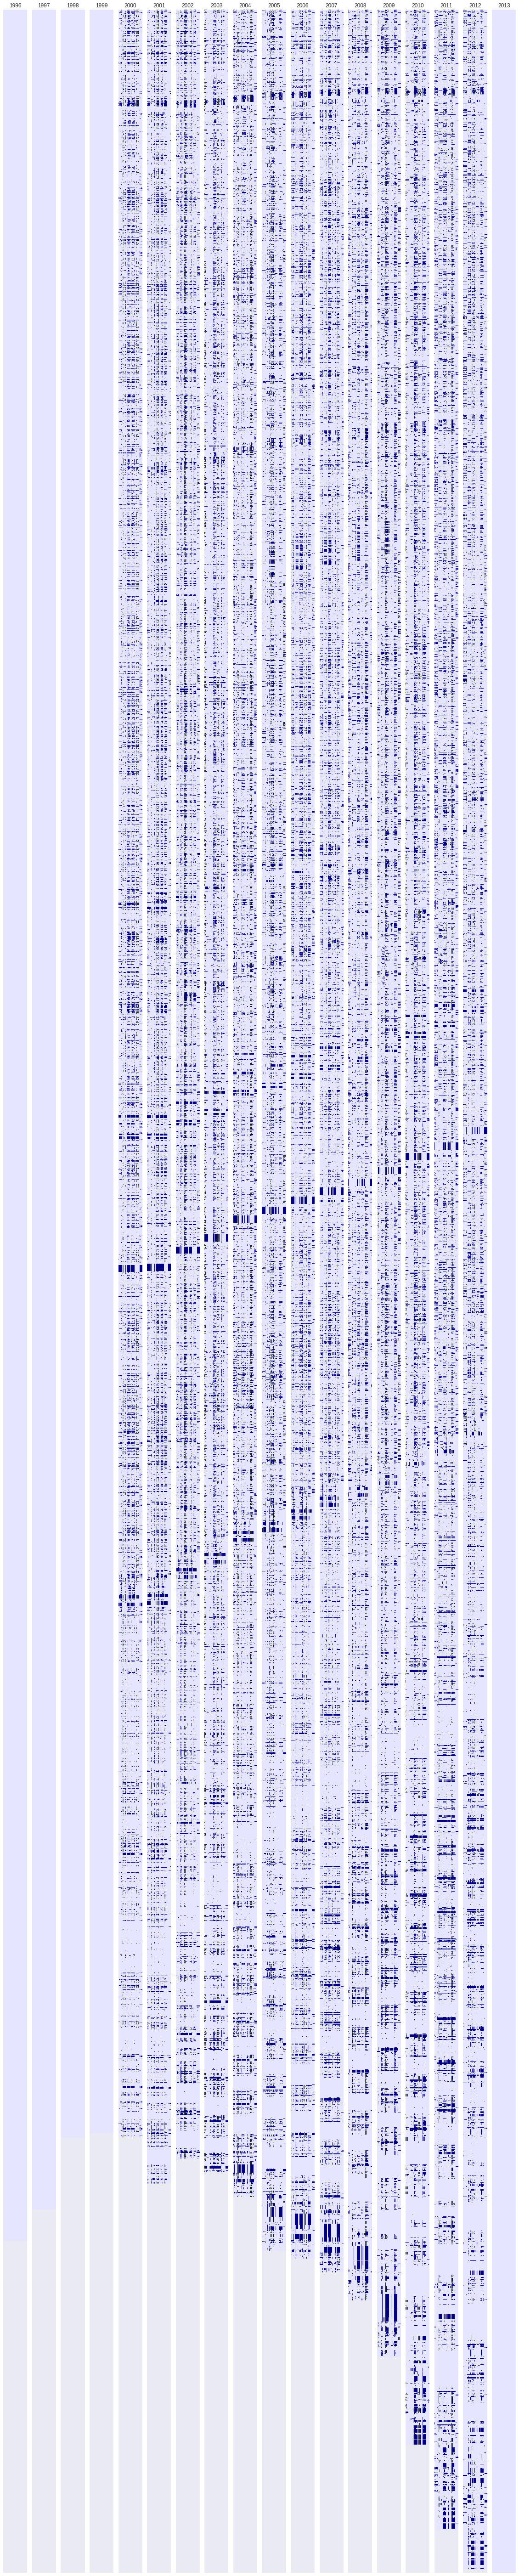

In [12]:
yearly = title4.groupby("year")
f, axarr = plt.subplots(1, len(yearly), sharey=True,figsize=(20,100))
for i,(year,data) in enumerate(yearly):
    nans = pd.isnull(data)
    axarr[i].imshow(nans, cmap=sns.light_palette("navy", as_cmap=True, reverse=True), interpolation='none')
    axarr[i].set_title(year)
plt.setp([a.get_xticklabels() for a in axarr], visible=False)
plt.setp([a.get_yticklabels() for a in axarr], visible=False)
f.savefig('missing_titleIV_map.png')

##### So there is no title IV data for 1996 through 1999 or 2013.  It's mostly NaN's for the other years as well :-(

### Now let's look at the completion rate data...

In [13]:
compRate = alldata[["UNITID", "INSTNM", "year"]+list(comp_rate_vars.index)]
compRate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 7803
Data columns (total 39 columns):
UNITID             124699 non-null int64
INSTNM             124699 non-null object
year               124699 non-null int64
C150_4             34880 non-null float64
C150_L4            61470 non-null float64
C150_4_POOLED      2472 non-null float64
C150_L4_POOLED     4018 non-null float64
D150_4             34880 non-null float64
D150_L4            61470 non-null float64
D150_4_POOLED      2472 non-null float64
D150_L4_POOLED     4018 non-null float64
C150_4_WHITE       7919 non-null float64
C150_4_BLACK       7360 non-null float64
C150_4_HISP        7123 non-null float64
C150_4_ASIAN       6165 non-null float64
C150_4_AIAN        5045 non-null float64
C150_4_NHPI        1110 non-null float64
C150_4_2MOR        2203 non-null float64
C150_4_NRA         23339 non-null float64
C150_4_UNKN        19340 non-null float64
C150_4_WHITENH     25436 non-null float64
C150_4_BLACKNH     234

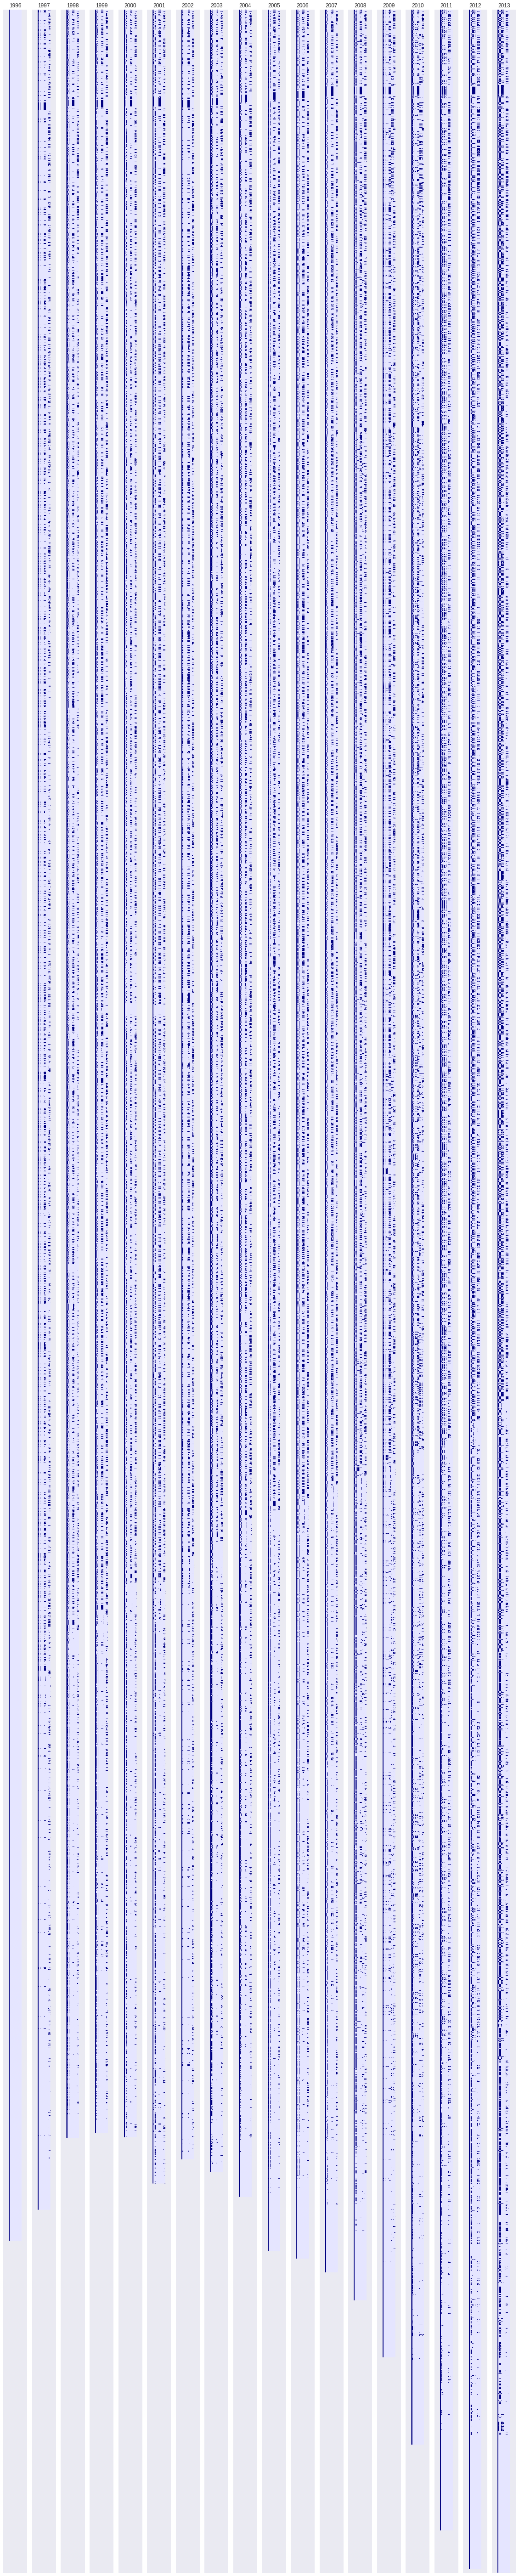

In [14]:
yearly = compRate.groupby("year")
f, axarr = plt.subplots(1, len(yearly), sharey=True,figsize=(20,100))
for i,(year,data) in enumerate(yearly):
    nans = pd.isnull(data)
    axarr[i].imshow(nans, cmap=sns.light_palette("navy", as_cmap=True, reverse=True), interpolation='none')
    axarr[i].set_title(year)
plt.setp([a.get_xticklabels() for a in axarr], visible=False)
plt.setp([a.get_yticklabels() for a in axarr], visible=False)
f.savefig('missing_compRate_map.png')

##### So still lots of missing data.

In [15]:
compDemo = alldata[["UNITID", "INSTNM", "year"]+list(comp_demographics_vars.index)]
compDemo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 7803
Data columns (total 73 columns):
UNITID             124699 non-null int64
INSTNM             124699 non-null object
year               124699 non-null int64
OVERALL_YR2_N      96337 non-null float64
LO_INC_YR2_N       78298 non-null float64
MD_INC_YR2_N       62380 non-null float64
HI_INC_YR2_N       18765 non-null float64
DEP_YR2_N          42199 non-null float64
IND_YR2_N          57921 non-null float64
FEMALE_YR2_N       72811 non-null float64
MALE_YR2_N         44989 non-null float64
PELL_YR2_N         58754 non-null float64
NOPELL_YR2_N       14642 non-null float64
LOAN_YR2_N         53740 non-null float64
NOLOAN_YR2_N       10376 non-null float64
FIRSTGEN_YR2_N     84001 non-null float64
NOT1STGEN_YR2_N    83654 non-null float64
OVERALL_YR3_N      89194 non-null float64
LO_INC_YR3_N       72636 non-null float64
MD_INC_YR3_N       58006 non-null float64
HI_INC_YR3_N       17985 non-null float64
DEP_YR3_N  

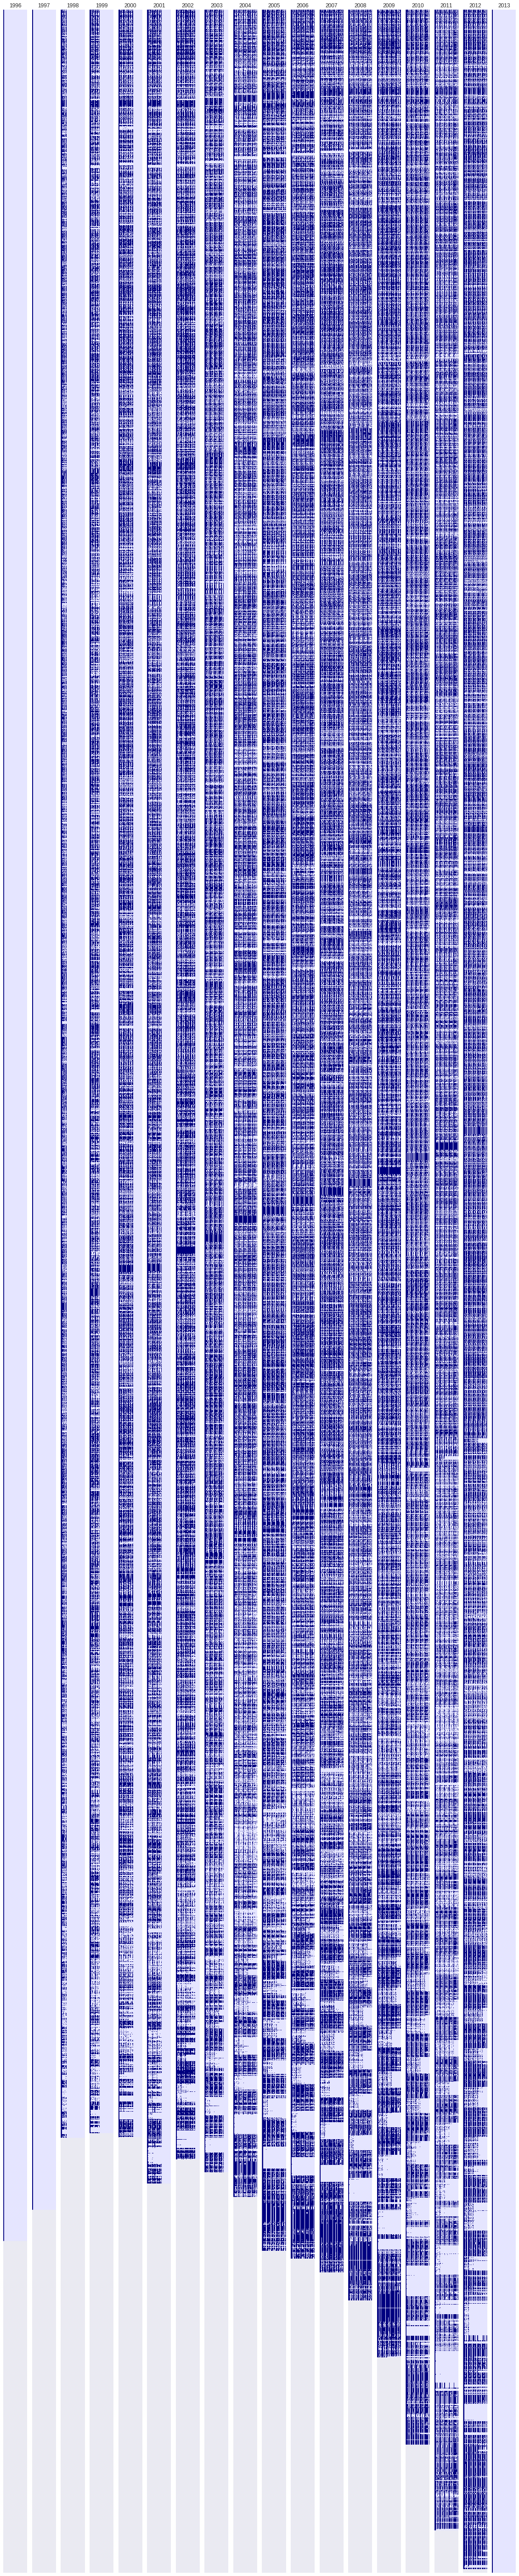

In [16]:
yearly = compDemo.groupby("year")
f, axarr = plt.subplots(1, len(yearly), sharey=True,figsize=(20,100))
for i,(year,data) in enumerate(yearly):
    nans = pd.isnull(data)
    axarr[i].imshow(nans, cmap=sns.light_palette("navy", as_cmap=True, reverse=True), interpolation='none')
    axarr[i].set_title(year)
plt.setp([a.get_xticklabels() for a in axarr], visible=False)
plt.setp([a.get_yticklabels() for a in axarr], visible=False)
f.savefig('missing_compDemographics_map.png')

# Let's focus on just the 2012 data for now...

In [17]:
gb =  alldata.groupby('year')
data = gb.get_group(2012)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7793 entries, 0 to 7792
Columns: 1730 entries, UNITID to year
dtypes: float64(1713), int64(7), object(10)
memory usage: 102.9+ MB


In [18]:
completion = data[["UNITID", "INSTNM", "sch_deg"]+comp_vars]

### Count all not-null values in each row

In [19]:
completion.count(axis=1).size

7793

/home/jhummel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


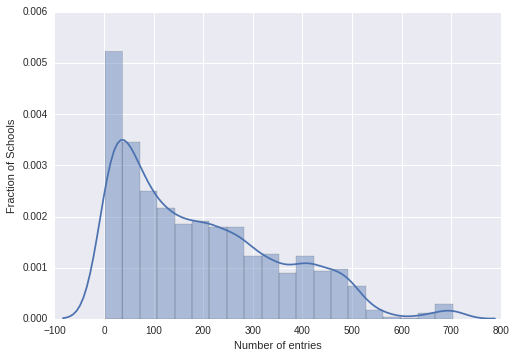

In [20]:
sns.set_style("darkgrid")
sns.distplot(completion.count(axis=1), bins=20, kde=True)
plt.xlabel("Number of entries")
plt.ylabel("Fraction of Schools")
plt.savefig("Missing_Data_histogram_all.png")

Count how many rows have fewer than N entries:

In [21]:
N = 100 #Includes UNITID, INSTNM, and sch_deg so < 4 means ZERO completion data!
print(completion[completion.count(axis=1) < N].shape)
#completion[completion.count(axis=1) < N].INSTNM
completion.set_index('INSTNM').count(axis=1).sort_values()

(2911, 1026)


INSTNM
Reconstructionist Rabbinical College                                                     1
The Commonwealth Medical College                                                         1
Hult International Business School                                                       1
Futura Career Institute                                                                  1
Saint Vincent de Paul Regional Seminary                                                  1
Nazarene Theological Seminary                                                            1
Union Presbyterian Seminary                                                              1
NorthShore University HealthSystem School of Nurse Anesthesia                            1
Westminster Theological Seminary in California                                           1
Center for Advanced Studies On Puerto Rico & the Caribbean                               1
Pacific Lutheran Theological Seminary                                              

### University of Phoenix, DeVry University, and Kaplan University Dominate Completion data!!!

#### It also appears a LOT of the missing data is coming from Beauty schools, Technical colleges, and other Vocational institutions.  Given that, it may be best to restrict our analysis to 4-year institutions:

In [22]:
degreeType = completion.groupby("sch_deg")
degreeTypeDict = {1: "Predominantly Certificate Degrees",
                  2: "Predominantly Associate's Degrees",
                  3: "Predominantly Bachelor's Degrees"}
bachelors = completion[completion.sch_deg == 3]
bachelors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 0 to 7792
Columns: 1026 entries, UNITID to C200_4_POOLED_SUPP
dtypes: float64(1023), int64(1), object(2)
memory usage: 20.5+ MB


### Count all non-null values in each _column_

In [23]:
col_entry_counts = bachelors.count(axis=0)
col_entry_counts.sort_values()

C200_4_POOLED_SUPP                     0
NOLOAN_DEATH_YR6_RT                    0
NOPELL_DEATH_YR2_RT                    0
C150_L4_WHITENH                        0
C150_L4_BLACKNH                        0
C150_L4_API                            0
C150_L4_HISPOld                        0
HI_INC_UNKN_2YR_TRANS_YR4_RT           0
HI_INC_UNKN_2YR_TRANS_YR6_RT           0
HI_INC_DEATH_YR3_RT                    0
HI_INC_DEATH_YR6_RT                    0
NOPELL_UNKN_4YR_TRANS_YR2_RT           0
DEP_DEATH_YR3_RT                       0
NOLOAN_DEATH_YR3_RT                    0
HI_INC_DEATH_YR8_RT                    0
MD_INC_DEATH_YR2_RT                    0
DEP_DEATH_YR2_RT                       0
NOPELL_UNKN_2YR_TRANS_YR3_RT           0
HI_INC_DEATH_YR4_RT                    0
LOAN_DEATH_YR8_RT                      0
DEP_DEATH_YR8_RT                       0
HI_INC_UNKN_2YR_TRANS_YR8_RT           0
NOLOAN_DEATH_YR4_RT                    0
IND_DEATH_YR2_RT                       0
NOPELL_UNKN_2YR_

/home/jhummel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


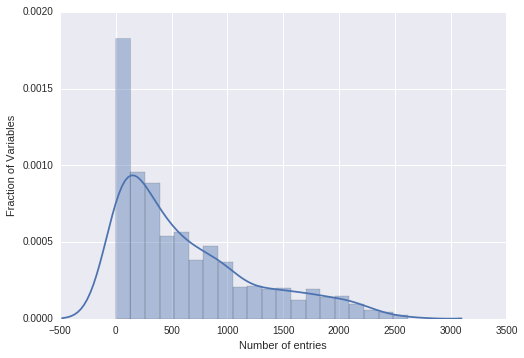

In [24]:
sns.distplot(bachelors.count(axis=0), bins=20, kde=True, rug=False)
plt.xlabel("Number of entries")
plt.ylabel("Fraction of Variables")

### Now, to cut down the number of variable to something manageable...
* What if we drop all death and transfer variables?
* Variables for "unknown" categories, whether demographic or otherwise?
* **Most importantly, should probably drop all variables with > 2/3 NaNs**

In [25]:
transfer_vars = comp_dict[comp_dict.index.str.contains("TRANS")]
death_vars = comp_dict[comp_dict.index.str.contains("DEATH")]
unkn_vars = comp_dict[comp_dict.index.str.contains("UNKN")]
drop_vars = transfer_vars.index.tolist() + death_vars.index.tolist() + unkn_vars.index.tolist()
len(transfer_vars), len(death_vars), len(unkn_vars)

(560, 70, 212)

In [26]:
bachelors.shape

(2615, 1026)

In [27]:
bachelors_dropvars = bachelors.drop(drop_vars, axis=1)
bachelors_dropvars.shape

(2615, 324)

In [28]:
bachelors_dropvars.count(axis=0).sort_values()

C200_4_POOLED_SUPP                0
C150_L4_HISPOld                   0
C150_L4_AIANOld                   0
C150_L4_API                       0
C150_L4_BLACKNH                   0
C150_L4_WHITENH                   0
C150_4_AIANOld                    0
C150_4_API                        0
C150_4_BLACKNH                    0
C150_4_WHITENH                    0
C200_L4_POOLED_SUPP               0
C150_4_HISPOld                    0
D150_4_POOLED                     0
C150_4_POOLED_SUPP                0
C150_L4_POOLED_SUPP               0
C150_4_POOLED                     0
poolyrs                           0
C150_L4_POOLED                    0
D150_L4_POOLED                    0
HI_INC_ENRL_ORIG_YR8_RT           1
NOLOAN_ENRL_ORIG_YR8_RT           2
C150_L4_NHPI                      6
C150_L4_NRA                       9
C150_L4_2MOR                     12
NOLOAN_ENRL_ORIG_YR6_RT          14
LOAN_ENRL_ORIG_YR8_RT            16
DEP_ENRL_ORIG_YR8_RT             18
C150_L4_ASIAN               

**Now, drop all variables with more than** ```nan_threshold``` **percent NaNs**

In [29]:
nan_threshold = .67
varcount_threshold = int((1-nan_threshold)*len(bachelors_dropvars))
varcount_threshold

862

In [30]:
rowcount_threshold = int((1-nan_threshold)*bachelors_dropvars.shape[1])
rowcount_threshold

106

In [31]:
bachelors_dropNA = bachelors_dropvars.dropna(axis=1, thresh=varcount_threshold)
bachelors_dropNA.dropna(axis=0, thresh=rowcount_threshold, inplace=True)

/home/jhummel/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
bachelors_dropNA.count(axis=0).sort_values()

NOPELL_YR8_N                    531
HI_INC_ENRL_ORIG_YR2_RT         604
HI_INC_COMP_ORIG_YR6_RT         650
HI_INC_YR2_N                    661
HI_INC_YR3_N                    685
HI_INC_YR4_N                    689
DEP_COMP_ORIG_YR8_RT            756
DEP_COMP_ORIG_YR6_RT            763
MD_INC_COMP_ORIG_YR2_RT         798
MALE_YR4_N                      798
DEP_COMP_ORIG_YR4_RT            828
DEP_COMP_ORIG_YR2_RT            836
DEP_WDRAW_ORIG_YR4_RT           836
DEP_COMP_ORIG_YR3_RT            843
ENRL_ORIG_YR6_RT                859
DEP_ENRL_ORIG_YR2_RT            869
LOAN_COMP_ORIG_YR2_RT           882
MALE_YR3_N                      907
LOAN_WDRAW_ORIG_YR2_RT          908
MD_INC_WDRAW_ORIG_YR2_RT        910
FIRSTGEN_ENRL_ORIG_YR4_RT       926
DEP_WDRAW_ORIG_YR2_RT           950
HI_INC_YR6_N                    956
DEP_WDRAW_ORIG_YR6_RT           959
FEMALE_WDRAW_ORIG_YR4_RT        993
MD_INC_ENRL_ORIG_YR3_RT         996
FEMALE_WDRAW_ORIG_YR3_RT        997
C150_4_AIAN                 

In [33]:
bachelors_dropNA.shape

(1685, 174)

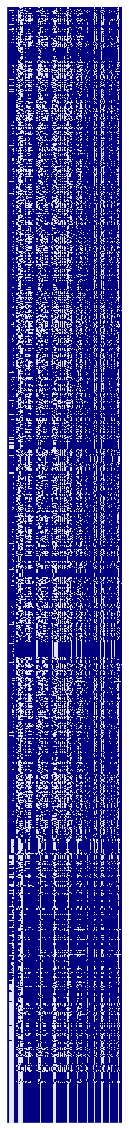

In [34]:
with sns.axes_style('dark'):
    nans = pd.isnull(bachelors_dropNA)
    f,ax = plt.subplots(figsize=(3,20))
    ax.imshow(nans.values, cmap=sns.light_palette("navy", as_cmap=True, reverse=True), interpolation='none')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

### OK, let's inspect the remaining variables:

In [42]:
comp_dict.loc[bachelors_dropNA.columns][['developer-friendly name', 'NAME OF DATA ELEMENT']]

developer-friendly name  \
UNITID                                                                 NaN   
INSTNM                                                                 NaN   
sch_deg                                                                NaN   
C150_4                                           completion_rate_4yr_150nt   
D150_4                                         completion_cohort_4yr_150nt   
C150_4_WHITE                                 completion_rate_4yr_150_white   
C150_4_BLACK                                 completion_rate_4yr_150_black   
C150_4_HISP                               completion_rate_4yr_150_hispanic   
C150_4_ASIAN                                 completion_rate_4yr_150_asian   
C150_4_AIAN                                   completion_rate_4yr_150_aian   
C150_4_NRA                       completion_rate_4yr_150_nonresident.alien   
COMP_ORIG_YR2_RT                                title_iv.completed_by.2yrs   
WDRAW_ORIG_YR2_RT                               title_iv.withdrawn_by.2yrs   
ENRL_ORIG_YR2_RT                           title_iv.still_enrolled_by.2yrs   
LO_INC_COMP_ORIG_YR2_RT                 title_iv.low_inc.completed_by.2yrs   
LO_INC_WDRAW_ORIG_YR2_RT                title_iv.low_inc.withdrawn_by.2yrs   
LO_INC_ENRL_ORIG_YR2_RT            title_iv.low_inc.still_enrolled_by.2yrs   
MD_INC_COMP_ORIG_YR2_RT                 title_iv.mid_inc.completed_by.2yrs   
MD_INC_WDRAW_ORIG_YR2_RT                title_iv.mid_inc.withdrawn_by.2yrs   
MD_INC_ENRL_ORIG_YR2_RT            title_iv.mid_inc.still_enrolled_by.2yrs   
HI_INC_ENRL_ORIG_YR2_RT           title_iv.high_inc.still_enrolled_by.2yrs   
DEP_COMP_ORIG_YR2_RT                     title_iv.depend.completed_by.2yrs   
DEP_WDRAW_ORIG_YR2_RT                    title_iv.depend.withdrawn_by.2yrs   
DEP_ENRL_ORIG_YR2_RT                title_iv.depend.still_enrolled_by.2yrs   
FEMALE_COMP_ORIG_YR2_RT                  title_iv.female.completed_by.2yrs   
FEMALE_WDRAW_ORIG_YR2_RT                 title_iv.female.withdrawn_by.2yrs   
FEMALE_ENRL_ORIG_YR2_RT             title_iv.female.still_enrolled_by.2yrs   
MALE_WDRAW_ORIG_YR2_RT                     title_iv.male.withdrawn_by.2yrs   
MALE_ENRL_ORIG_YR2_RT                 title_iv.male.still_enrolled_by.2yrs   
PELL_COMP_ORIG_YR2_RT                title_iv.pell_recip.completed_by.2yrs   
PELL_WDRAW_ORIG_YR2_RT               title_iv.pell_recip.withdrawn_by.2yrs   
PELL_ENRL_ORIG_YR2_RT           title_iv.pell_recip.still_enrolled_by.2yrs   
LOAN_COMP_ORIG_YR2_RT                title_iv.loan_recip.completed_by.2yrs   
LOAN_WDRAW_ORIG_YR2_RT               title_iv.loan_recip.withdrawn_by.2yrs   
LOAN_ENRL_ORIG_YR2_RT           title_iv.loan_recip.still_enrolled_by.2yrs   
FIRSTGEN_COMP_ORIG_YR2_RT             title_iv.first_gen.completed_by.2yrs   
FIRSTGEN_WDRAW_ORIG_YR2_RT            title_iv.first_gen.withdrawn_by.2yrs   
FIRSTGEN_ENRL_ORIG_YR2_RT        title_iv.first_gen.still_enrolled_by.2yrs   
NOT1STGEN_COMP_ORIG_YR2_RT        title_iv.not_first_gen.completed_by.2yrs   
NOT1STGEN_WDRAW_ORIG_YR2_RT       title_iv.not_first_gen.withdrawn_by.2yrs   
NOT1STGEN_ENRL_ORIG_YR2_RT   title_iv.not_first_gen.still_enrolled_by.2yrs   
COMP_ORIG_YR3_RT                                title_iv.completed_by.3yrs   
WDRAW_ORIG_YR3_RT                               title_iv.withdrawn_by.3yrs   
ENRL_ORIG_YR3_RT                           title_iv.still_enrolled_by.3yrs   
LO_INC_COMP_ORIG_YR3_RT                 title_iv.low_inc.completed_by.3yrs   
LO_INC_WDRAW_ORIG_YR3_RT                title_iv.low_inc.withdrawn_by.3yrs   
LO_INC_ENRL_ORIG_YR3_RT            title_iv.low_inc.still_enrolled_by.3yrs   
MD_INC_COMP_ORIG_YR3_RT                 title_iv.mid_inc.completed_by.3yrs   
MD_INC_WDRAW_ORIG_YR3_RT                title_iv.mid_inc.withdrawn_by.3yrs   
MD_INC_ENRL_ORIG_YR3_RT            title_iv.mid_inc.still_enrolled_by.3yrs   
DEP_COMP_ORIG_YR3_RT                     title_iv.depend.completed_by.3yr

What we see in the remaining data are statistics on the percent of students who have either:
- completed their degree course
- withdrawn without completing
- are still enrolled

In addition to the overall rate for each of these categories, these statistics are then broken out into the following demographic categories:
- Gender
    - male
    - female
    
    
- Race
    - white
    - black 
    - hispanic
    - asian
    - native american
    - nonresident alien
    
    
- Economic status
    - low income (defined as < \$30,000 per year in nominal family income)
    - middle income (defined as between \$30,000 and \$75,000 per year in nominal family income)
    - high income (defined as > \$75,000 per year in nominal family income)
    
    
- Federal loan recipients
- Pell grant recipients
- First-generation college student status

Finally, we get this data for 2-year, 3-year, 4-year, 6-year, and 8-year cohorts.

#### As much of the background research we've done suggests that COMPLETING your degree is the most important thing in making college worth it, and that the longer you take the less likely you are to ever finish, I propose we focus on the 6-year completion data (nominally "on-time" for a 4-year degree).

In [61]:
bachelors_dropNA.loc[:,bachelors_dropNA.columns.str.contains("_YR6_RT")].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 7792
Data columns (total 18 columns):
COMP_ORIG_YR6_RT               1685 non-null float64
WDRAW_ORIG_YR6_RT              1684 non-null float64
ENRL_ORIG_YR6_RT               859 non-null float64
LO_INC_COMP_ORIG_YR6_RT        1293 non-null float64
LO_INC_WDRAW_ORIG_YR6_RT       1317 non-null float64
MD_INC_COMP_ORIG_YR6_RT        1438 non-null float64
MD_INC_WDRAW_ORIG_YR6_RT       1313 non-null float64
HI_INC_COMP_ORIG_YR6_RT        650 non-null float64
DEP_COMP_ORIG_YR6_RT           763 non-null float64
DEP_WDRAW_ORIG_YR6_RT          959 non-null float64
FEMALE_COMP_ORIG_YR6_RT        1435 non-null float64
FEMALE_WDRAW_ORIG_YR6_RT       1112 non-null float64
PELL_COMP_ORIG_YR6_RT          1205 non-null float64
PELL_WDRAW_ORIG_YR6_RT         1193 non-null float64
FIRSTGEN_COMP_ORIG_YR6_RT      1543 non-null float64
FIRSTGEN_WDRAW_ORIG_YR6_RT     1374 non-null float64
NOT1STGEN_COMP_ORIG_YR6_RT     1666 non-null floa

In [63]:
bachelors_dropNA.loc[:,bachelors_dropNA.columns.str.contains("150")].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 7792
Data columns (total 8 columns):
C150_4          1399 non-null float64
D150_4          1399 non-null float64
C150_4_WHITE    1359 non-null float64
C150_4_BLACK    1351 non-null float64
C150_4_HISP     1326 non-null float64
C150_4_ASIAN    1192 non-null float64
C150_4_AIAN     1002 non-null float64
C150_4_NRA      1065 non-null float64
dtypes: float64(8)
memory usage: 118.5 KB


# In summary, I suggest the following:
1. A great deal of the missing data is coming from predominantly certificate-granting institutions.  I suggest we restrict our analysis to primarily Bachelor's degree-granting institutions.


2. **Most** of the data in the college scorecard is missing, for various reasons, either because it was never gathered, or is not applicable for a particular institution.  I suggest we eliminate all variables and institutions with more than two-thirds of the data missing from our analysis.


3. The completion data consists of over 1000 variables.  However, much of this data deals with edge cases, like students who died before matriculating, transfer students, and "unknown" variables for every category tracked.  Eliminating just these cuts the number of variables in half.  

   Additionally, these statistics are available for every category at the 2, 3, 4, 6, and 8-year mark.  I suggest we focus on the 6-year data (150% of time-to-degree for 4-year programs), and keep all of the demographic data for this subset.
   
This leaves us with the following 24 columns:
 - `C150_4`
 - `D150_4`
 - `C150_4_WHITE`
 - `C150_4_BLACK`
 - `C150_4_HISP`
 - `C150_4_ASIAN`
 - `C150_4_AIAN`
 - `C150_4_NRA`
 - `COMP_ORIG_YR6_RT`
 - `WDRAW_ORIG_YR6_RT`
 - `ENRL_ORIG_YR6_RT`
 - `LO_INC_COMP_ORIG_YR6_RT`
 - `LO_INC_WDRAW_ORIG_YR6_RT`
 - `MD_INC_COMP_ORIG_YR6_RT`
 - `MD_INC_WDRAW_ORIG_YR6_RT`
 - `HI_INC_COMP_ORIG_YR6_RT`
 - `DEP_COMP_ORIG_YR6_RT`
 - `DEP_WDRAW_ORIG_YR6_RT`
 - `FEMALE_COMP_ORIG_YR6_RT`
 - `FEMALE_WDRAW_ORIG_YR6_RT`
 - `PELL_COMP_ORIG_YR6_RT`
 - `PELL_WDRAW_ORIG_YR6_RT`
 - `FIRSTGEN_COMP_ORIG_YR6_RT`
 - `FIRSTGEN_WDRAW_ORIG_YR6_RT`
 - `NOT1STGEN_COMP_ORIG_YR6_RT`
 - `NOT1STGEN_WDRAW_ORIG_YR6_RT`
 
 Interestingly, the percent of students still enrolled at 6 years is no longer broken out into sub-groups, so we may wish to incorporate the 4-year data for those still enrolled.